In [49]:
# Imports for Data Analysis and EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Imports for Model Training (Classification)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Imports for Model Performance Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

DATA PREPARATION

In [50]:
df = pd.read_csv('/content/data.csv')
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [51]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [52]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')


In [53]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [54]:
df.dtypes

,0
customerid,object
gender,object
seniorcitizen,int64
partner,object
dependents,object
tenure,int64
phoneservice,object
multiplelines,object
internetservice,object
onlinesecurity,object


In [55]:
tc=pd.to_numeric(df.totalcharges,errors='coerce')

In [56]:
df[tc.isnull()][['customerid','totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [57]:
df.totalcharges=pd.to_numeric(df.totalcharges,errors='coerce')

In [58]:
df.totalcharges.isnull().sum()

np.int64(11)

In [59]:
df.totalcharges.fillna(0)

,totalcharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


In [60]:
df.churn.value_counts()

,count
churn,
no,5174
yes,1869


In [61]:
df.churn=(df.churn=='yes').astype(int)

In [62]:
df.churn.head(4)

,churn
0,0
1,0
2,1
3,0


In [63]:
df.shape

(7043, 21)

Setting Up Validation Framework

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
df_full_train,df_test=train_test_split(df,test_size=0.2,random_state=1)

In [66]:
len(df_full_train),len(df_test)

(5634, 1409)

In [67]:
df_train,df_val=train_test_split(df_full_train,test_size=0.25,random_state=1)

In [68]:
len(df_train),len(df_val),len(df_test)

(4225, 1409, 1409)

In [69]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [70]:
y_train=df_train.churn.values
y_val=df_val.churn.values
y_test=df_test.churn.values

In [71]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

EDA

In [72]:
df_full_train=df_full_train.reset_index(drop=True)

In [73]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [76]:
df_full_train.churn.value_counts()

,count
churn,
0,4113
1,1521


In [77]:
global_churn_rate=df_full_train.churn.mean()

In [79]:
round(global_churn_rate,2)

np.float64(0.27)

In [80]:
df_full_train.dtypes

,0
customerid,object
gender,object
seniorcitizen,int64
partner,object
dependents,object
tenure,int64
phoneservice,object
multiplelines,object
internetservice,object
onlinesecurity,object


In [81]:
numerical=['tenure','monthlycharges','totalcharges']

In [82]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [83]:
categorical=['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [84]:
df_full_train[categorical].nunique()

,0
gender,2
seniorcitizen,2
partner,2
dependents,2
phoneservice,2
multiplelines,3
internetservice,3
onlinesecurity,3
onlinebackup,3
deviceprotection,3


Feature Importance

In [86]:
churn_f=df_full_train[df_full_train.gender=='female'].churn.mean()

In [87]:
churn_m=df_full_train[df_full_train.gender=='male'].churn.mean()

In [90]:
churn_patner=df_full_train[df_full_train.partner=='yes'].churn.mean()
churn_patner

np.float64(0.20503330866025166)

In [91]:
churn_no_patner=df_full_train[df_full_train.partner=='no'].churn.mean()

In [92]:
churn_no_patner

np.float64(0.3298090040927694)

churn_rate
## Difference

In [94]:
global_churn_rate-churn_no_patner

np.float64(-0.05984095297455855)

In [95]:
global_churn_rate-churn_patner
#

np.float64(0.06493474245795922)

Risk Ratio

Divide the group/global


In [96]:
churn_no_patner/global_churn_rate

np.float64(1.2216593879412643)

In [97]:
churn_patner/global_churn_rate
#

np.float64(0.7594724924338315)

In [98]:
 df_group=df_full_train.groupby('gender').churn.agg(['mean','count'])

In [101]:
from IPython.display import display

In [105]:
for c in categorical:
  print(c)
  df_group=df_full_train.groupby(c).churn.agg(['mean','count'])
  df_group['diff']=df_group['mean']-global_churn_rate
  df_group['risk']=df_group['mean']/global_churn_rate
  display(df_group)
  print()
  print()

#




gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


Feature Importance: Mutual Importance

In [107]:
from sklearn.metrics import mutual_info_score as mis

In [108]:
mis(df_full_train.churn,df_full_train.contract)

np.float64(0.0983203874041556)

In [109]:
mis(df_full_train.gender,df_full_train.churn)

np.float64(0.0001174846211139946)

In [110]:
def mis_churn_score(series):
  return mis(series,df_full_train.churn)

In [112]:
mi=df_full_train[categorical].apply(mis_churn_score)

In [113]:
mi.sort_values(ascending=False)

,0
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


Feature Importance: Correlation

checking for corr


In [114]:
df_full_train[numerical].corrwith(df_full_train.churn)

,0
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.197416


In [115]:
df_full_train.tenure.max()

72

In [116]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

,0
tenure,0.351885
monthlycharges,0.196805
totalcharges,0.197416


**One Hot Encoding**

In [120]:
df_train_copy=df_train.copy()

In [119]:
from sklearn.feature_extraction import DictVectorizer

In [132]:
train_dicts=df_train[categorical + numerical ].to_dict(orient='records')

In [134]:
dv=DictVectorizer(sparse=False)

In [141]:
X_train=dv.fit_transform(train_dicts)

In [142]:
X_train.shape

(4225, 45)

In [144]:
val_dicts=df_val[categorical + numerical ].to_dict(orient='records')

In [145]:
X_val=dv.transform(val_dicts)

Logistic Regression

In [146]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [147]:
z=np.linspace(-5,5,51)

In [148]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

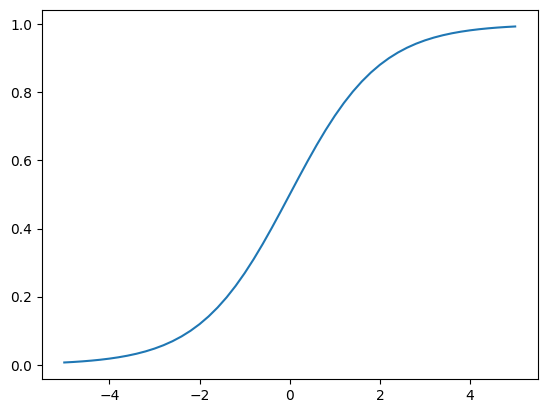

In [149]:
plt.plot(z,sigmoid(z))

In [155]:
X_train_copy=X_train.copy()

In [159]:
import numpy as np

# Check for missing values in X_train (NumPy array)
missing_values = np.isnan(X_train)  # This returns a boolean array where True means NaN

# Count how many missing values are in the array
missing_count = np.sum(missing_values)
print(f"Number of missing values in X_train: {missing_count}")

# Optionally, see which rows and columns have NaNs
rows_with_nans = np.where(np.isnan(X_train))[0]  # Get rows with NaNs
columns_with_nans = np.where(np.isnan(X_train))[1]  # Get columns with NaNs

print(f"Rows with missing values: {rows_with_nans}")
print(f"Columns with missing values: {columns_with_nans}")


Number of missing values in X_train: 5
Rows with missing values: [ 466 1293 2903 3811 4091]
Columns with missing values: [44 44 44 44 44]


In [160]:
from sklearn.impute import SimpleImputer

# Impute missing values in column 44 with the median
imputer = SimpleImputer(strategy='median')

# Since the missing values are only in column 44, let's focus on that column
X_train[:, 44] = imputer.fit_transform(X_train[:, 44].reshape(-1, 1)).flatten()  # reshape for single column

# Check if the missing values have been imputed
missing_values_after_imputation = np.isnan(X_train).sum()
print(f"Number of missing values after imputation: {missing_values_after_imputation}")


Number of missing values after imputation: 0


Training Log Reg

In [150]:
from sklearn.linear_model import LogisticRegression

In [180]:
model=LogisticRegression()

In [181]:
model.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [182]:
model.coef_[0].round(3)

array([ 0.571, -0.151, -0.532, -0.01 , -0.101,  0.07 , -0.099, -0.082,
       -0.034, -0.077, -0.357,  0.345, -0.099,  0.002, -0.249,  0.158,
       -0.02 ,  0.064, -0.099, -0.076,  0.248, -0.099, -0.259, -0.229,
        0.118, -0.116,  0.004, -0.097, -0.032,  0.044, -0.026,  0.158,
       -0.27 ,  0.219, -0.098, -0.099,  0.086, -0.05 , -0.099,  0.038,
        0.191, -0.099, -0.203, -0.07 ,  0.   ])

In [186]:
import numpy as np

# Check for missing values in X_train (NumPy array)
missing_values = np.isnan(X_val)  # This returns a boolean array where True means NaN

# Count how many missing values are in the array
missing_count = np.sum(missing_values)
print(f"Number of missing values in X_val: {missing_count}")

# Optionally, see which rows and columns have NaNs
rows_with_nans = np.where(np.isnan(X_val))[0]  # Get rows with NaNs
columns_with_nans = np.where(np.isnan(X_val))[1]  # Get columns with NaNs

print(f"Rows with missing values: {rows_with_nans}")
print(f"Columns with missing values: {columns_with_nans}")


Number of missing values in X_val: 3
Rows with missing values: [ 268  530 1355]
Columns with missing values: [44 44 44]


In [187]:
from sklearn.impute import SimpleImputer

# Impute missing values in column 44 with the median
imputer = SimpleImputer(strategy='median')

# Since the missing values are only in column 44, let's focus on that column
X_val[:, 44] = imputer.fit_transform(X_val[:, 44].reshape(-1, 1)).flatten()  # reshape for single column

# Check if the missing values have been imputed
missing_values_after_imputation = np.isnan(X_val).sum()
print(f"Number of missing values after imputation: {missing_values_after_imputation}")


Number of missing values after imputation: 0


In [188]:
y_pred=model.predict_proba(X_val)[:,1]

In [190]:
churn_decision=(y_pred>=0.5)

Performance

In [191]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [193]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [194]:
(y_val==churn_decision).mean()

np.float64(0.7998580553584103)

In [195]:
df_pre=pd.DataFrame()
df_pre['probability']=y_pred
df_pre['prediction']=churn_decision.astype(int)
df_pre['actual']=y_val
df_pre['correct']=df_pre.prediction==df_pre.actual

In [196]:
df_pre

,probability,prediction,actual,correct
0,0.007941,0,0,True
1,0.210001,0,0,True
2,0.225319,0,0,True
3,0.564322,1,1,True
4,0.220344,0,0,True
...,...,...,...,...
1404,0.298611,0,0,True
1405,0.035796,0,1,False
1406,0.152748,0,0,True
1407,0.775902,1,1,True


Model Interpretations

In [197]:
dict(zip(dv.get_feature_names_out(),model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.571),
 'contract=one_year': np.float64(-0.151),
 'contract=two_year': np.float64(-0.532),
 'dependents=no': np.float64(-0.01),
 'dependents=yes': np.float64(-0.101),
 'deviceprotection=no': np.float64(0.07),
 'deviceprotection=no_internet_service': np.float64(-0.099),
 'deviceprotection=yes': np.float64(-0.082),
 'gender=female': np.float64(-0.034),
 'gender=male': np.float64(-0.077),
 'internetservice=dsl': np.float64(-0.357),
 'internetservice=fiber_optic': np.float64(0.345),
 'internetservice=no': np.float64(-0.099),
 'monthlycharges': np.float64(0.002),
 'multiplelines=no': np.float64(-0.249),
 'multiplelines=no_phone_service': np.float64(0.158),
 'multiplelines=yes': np.float64(-0.02),
 'onlinebackup=no': np.float64(0.064),
 'onlinebackup=no_internet_service': np.float64(-0.099),
 'onlinebackup=yes': np.float64(-0.076),
 'onlinesecurity=no': np.float64(0.248),
 'onlinesecurity=no_internet_service': np.float64(-0.099),
 'onlinesecurity=yes':

In [198]:
model.intercept_

array([-0.11361116])

In [213]:
small=['tenure','monthlycharges','contract']

In [214]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'tenure': 72, 'monthlycharges': 115.5, 'contract': 'two_year'},
 {'tenure': 10, 'monthlycharges': 95.25, 'contract': 'month-to-month'},
 {'tenure': 5, 'monthlycharges': 75.55, 'contract': 'month-to-month'},
 {'tenure': 5, 'monthlycharges': 80.85, 'contract': 'month-to-month'},
 {'tenure': 18, 'monthlycharges': 20.1, 'contract': 'two_year'},
 {'tenure': 4, 'monthlycharges': 30.5, 'contract': 'month-to-month'},
 {'tenure': 1, 'monthlycharges': 75.1, 'contract': 'month-to-month'},
 {'tenure': 1, 'monthlycharges': 70.3, 'contract': 'month-to-month'},
 {'tenure': 72, 'monthlycharges': 19.75, 'contract': 'two_year'},
 {'tenure': 6, 'monthlycharges': 109.9, 'contract': 'month-to-month'}]

In [215]:
dicts_train_small=df_train[small].to_dict(orient='records')
dicts_val_small=df_val[small].to_dict(orient='records')

In [216]:
dv_small=DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [217]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [218]:
X_train_small=dv_small.transform(dicts_train_small)

In [220]:
model_small=LogisticRegression()
model_small.fit(X_train_small,y_train)

LogisticRegression()

In [223]:
model_small.intercept_[0]

np.float64(-2.477957595829565)

In [224]:
w=model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [226]:
dict(zip(dv_small.get_feature_names_out(),w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

Using The Model

In [227]:
dicts_full_train=df_full_train[categorical+numerical].to_dict(orient='records')
dv_full=DictVectorizer(sparse=False)
X_full_train=dv_full.fit_transform(dicts_full_train)

In [229]:
y_full_train=df_full_train.churn.values

In [231]:
import numpy as np

# Check for missing values in X_train (NumPy array)
missing_values = np.isnan(X_full_train)  # This returns a boolean array where True means NaN

# Count how many missing values are in the array
missing_count = np.sum(missing_values)
print(f"Number of missing values in X_full_train: {missing_count}")

# Optionally, see which rows and columns have NaNs
rows_with_nans = np.where(np.isnan(X_full_train))[0]  # Get rows with NaNs
columns_with_nans = np.where(np.isnan(X_full_train))[1]  # Get columns with NaNs

print(f"Rows with missing values: {rows_with_nans}")
print(f"Columns with missing values: {columns_with_nans}")


Number of missing values in X_full_train: 8
Rows with missing values: [ 899 2224 2697 3054 3488 4056 4761 5607]
Columns with missing values: [44 44 44 44 44 44 44 44]


In [232]:
from sklearn.impute import SimpleImputer

# Impute missing values in column 44 with the median
imputer = SimpleImputer(strategy='median')

# Since the missing values are only in column 44, let's focus on that column
X_full_train[:, 44] = imputer.fit_transform(X_full_train[:, 44].reshape(-1, 1)).flatten()  # reshape for single column

# Check if the missing values have been imputed
missing_values_after_imputation = np.isnan(X_full_train).sum()
print(f"Number of missing values after imputation: {missing_values_after_imputation}")


Number of missing values after imputation: 0


In [234]:
model_full=LogisticRegression()
model_full.fit(X_full_train,y_full_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [235]:
dicts_test=df_test[categorical+numerical].to_dict(orient='records')

In [236]:
X_test=dv_full.transform(dicts_test)

In [238]:
# Check for missing values in X_train (NumPy array)
missing_values = np.isnan(X_test)  # This returns a boolean array where True means NaN

# Count how many missing values are in the array
missing_count = np.sum(missing_values)
print(f"Number of missing values in X_test: {missing_count}")

# Optionally, see which rows and columns have NaNs
rows_with_nans = np.where(np.isnan(X_test))[0]  # Get rows with NaNs
columns_with_nans = np.where(np.isnan(X_test))[1]  # Get columns with NaNs

print(f"Rows with missing values: {rows_with_nans}")
print(f"Columns with missing values: {columns_with_nans}")


Number of missing values in X_test: 3
Rows with missing values: [ 103  592 1327]
Columns with missing values: [44 44 44]


In [239]:

# Impute missing values in column 44 with the median
imputer = SimpleImputer(strategy='median')

# Since the missing values are only in column 44, let's focus on that column
X_test[:, 44] = imputer.fit_transform(X_test[:, 44].reshape(-1, 1)).flatten()  # reshape for single column

# Check if the missing values have been imputed
missing_values_after_imputation = np.isnan(X_test).sum()
print(f"Number of missing values after imputation: {missing_values_after_imputation}")

Number of missing values after imputation: 0


In [240]:
y_pred=model.predict_proba(X_test)[:,1]

In [241]:
churn_decision=(y_pred>=0.5)

In [242]:
(churn_decision == y_test).mean()

np.float64(0.8112136266855926)

In [256]:
customer=dicts_test[20]
customer

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'no',
 'onlinesecurity': 'no_internet_service',
 'onlinebackup': 'no_internet_service',
 'deviceprotection': 'no_internet_service',
 'techsupport': 'no_internet_service',
 'streamingtv': 'no_internet_service',
 'streamingmovies': 'no_internet_service',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 1,
 'monthlycharges': 20.25,
 'totalcharges': 20.25}

In [257]:
x_small=dv_full.transform([customer])
model_full.predict_proba(x_small)[0,1]

np.float64(0.23666834093571829)

In [258]:
y_test[20]

np.int64(0)